# Convolutional Neural Network (CNN) com 9 atributos

## Utilização dos atributos Acelerômetro, Som, Orientação, Aceleração Linear, Giroscópio, Vetor de Rotação, Vetor de Rotação para Jogos, Giroscópio descalibrado e Velocidade.

### Instalação de recursos no notebook

In [1]:
import sys
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install keras
!{sys.executable} -m pip install tensorflow
!{sys.executable} -m pip install pydot

Requirement already up-to-date: pip in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (18.1)


### Importação de bibliotecas e carregamento do arquivo (Janela de 0.5 segundos)

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('dataset_halfSecondWindow[3].csv')

### Divisão da base de dados em dados de treino e teste

In [3]:
from sklearn.cross_validation import train_test_split
df, test = train_test_split(data, test_size = 0.2, random_state = 0)

df.T

print(df.target.unique())
print("----------------------------------------")
print(df.target.value_counts())

['Bus' 'Car' 'Walking' 'Train' 'Still']
----------------------------------------
Car        10096
Bus        10030
Still      10019
Train       9978
Walking     9945
Name: target, dtype: int64


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Verificação das quantidades de dados para cada um dos rótulos

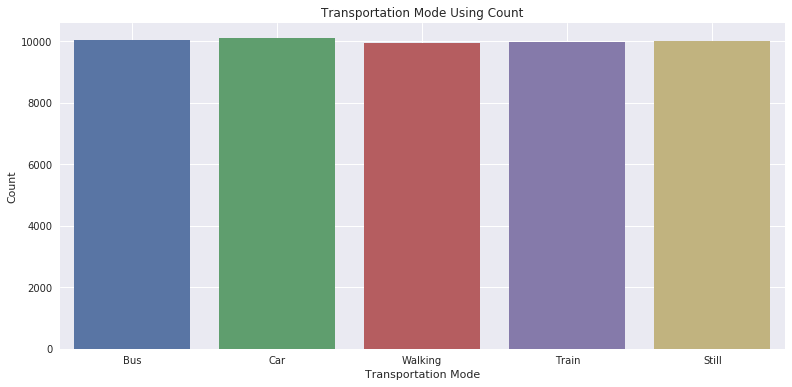

In [4]:
sns.set(rc={'figure.figsize':(13,6)})
fig = sns.countplot(x = "target" , data = df)
plt.xlabel("Transportation Mode")
plt.ylabel("Count")
plt.title("Transportation Mode Using Count")
plt.grid(True)
plt.show(fig)

### Verificação das dimensões dos dados de treino e dos dados de teste e dos nomes dos atributos

In [5]:
print(df.shape , test.shape)

df.columns

(50068, 38) (12517, 38)


Index(['time', 'android.sensor.accelerometer#mean',
       'android.sensor.accelerometer#min', 'android.sensor.accelerometer#max',
       'android.sensor.accelerometer#std',
       'android.sensor.game_rotation_vector#mean',
       'android.sensor.game_rotation_vector#min',
       'android.sensor.game_rotation_vector#max',
       'android.sensor.game_rotation_vector#std',
       'android.sensor.gyroscope#mean', 'android.sensor.gyroscope#min',
       'android.sensor.gyroscope#max', 'android.sensor.gyroscope#std',
       'android.sensor.gyroscope_uncalibrated#mean',
       'android.sensor.gyroscope_uncalibrated#min',
       'android.sensor.gyroscope_uncalibrated#max',
       'android.sensor.gyroscope_uncalibrated#std',
       'android.sensor.linear_acceleration#mean',
       'android.sensor.linear_acceleration#min',
       'android.sensor.linear_acceleration#max',
       'android.sensor.linear_acceleration#std',
       'android.sensor.orientation#mean', 'android.sensor.orientation#min',


### Verificação da dimensionalidade de alguns atributos

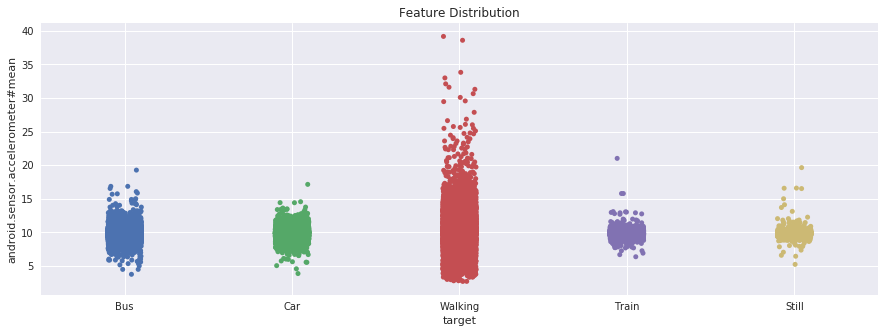

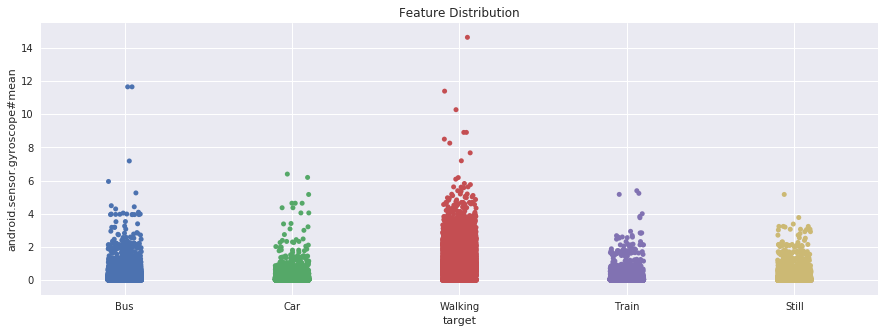

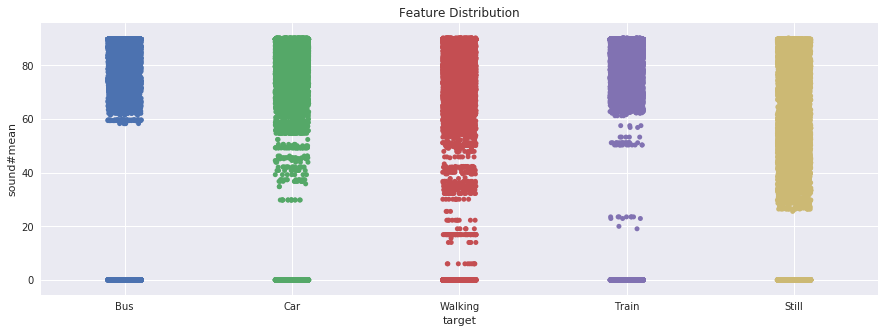

In [6]:
sns.set(rc={'figure.figsize':(15,5)})
fig1 = sns.stripplot(x='target', y= 'android.sensor.accelerometer#mean', data= df, jitter=True)
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

sns.set(rc={'figure.figsize':(15,5)})
fig1 = sns.stripplot(x='target', y= 'android.sensor.gyroscope#mean', data= df, jitter=True)
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

sns.set(rc={'figure.figsize':(15,5)})
fig1 = sns.stripplot(x='target', y= 'sound#mean', data= df, jitter=True)
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig)

### Redimensionamento dos atributos

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df.iloc[:,0:37])
mat_train = scaler.transform(df.iloc[:,0:37])
print(mat_train)

scaler = MinMaxScaler()
scaler.fit(test.iloc[:,0:37])
mat_test = scaler.transform(test.iloc[:,0:37])
print(mat_test)

[[0.07669789 0.19454112 0.23763334 ... 0.         0.         0.        ]
 [0.03307963 0.18974781 0.21774556 ... 0.20882481 0.20882481 0.        ]
 [0.06879391 0.30070485 0.26279945 ... 0.02856026 0.02856026 0.        ]
 ...
 [0.08752927 0.18969198 0.23887143 ... 0.         0.         0.        ]
 [0.12265808 0.20891269 0.25422392 ... 0.         0.         0.        ]
 [0.07830796 0.27204617 0.30821231 ... 0.         0.         0.        ]]
[[0.05294031 0.32850395 0.29609156 ... 0.         0.         0.        ]
 [0.00527937 0.3256498  0.36611251 ... 0.         0.         0.        ]
 [0.17289925 0.28862582 0.3065007  ... 0.63278742 0.63278742 0.        ]
 ...
 [0.25296964 0.29916603 0.34102481 ... 0.         0.         0.        ]
 [0.42938847 0.26882174 0.31269427 ... 0.         0.         0.        ]
 [0.01789119 0.30911141 0.31541114 ... 0.05154339 0.05154339 0.        ]]


### Codificação das variáveis dependentes

In [8]:
temp = []
for i in df.target:
    if i == "Car": temp.append(0)
    if i == "Walking": temp.append(1)
    if i == "Train": temp.append(2)
    if i == "Bus": temp.append(3)
    if i == "Still": temp.append(4)
df["n_Target"] = temp

temp = []
for i in test.target:
    if i == "Car": temp.append(0)
    if i == "Walking": temp.append(1)
    if i == "Train": temp.append(2)
    if i == "Bus": temp.append(3)
    if i == "Still": temp.append(4)
test["n_Target"] = temp

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Isolando as variáveis dependentes

In [9]:
y_train = df["n_Target"]

y_test = test["n_Target"]

### Preparação dos dados para a rede neural

In [10]:
import keras
from keras.utils import to_categorical

y_train = to_categorical(df.n_Target , num_classes=5)
y_test = to_categorical(test.n_Target , num_classes=5)

X_train = mat_train
X_test = mat_test

X_test = np.expand_dims(X_test, axis=2)
X_train = np.expand_dims(X_train, axis=2)


print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

Using TensorFlow backend.


(50068, 37, 1) (50068, 5)
(12517, 37, 1) (12517, 5)


### Ajuste e validação do modelo
Nesse primeiro momento, os hiperparâmetros foram definidos de forma arbitrária.

In [11]:
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical

# Ajustando e validando um modelo
def evaluate_model(X_train, y_train, X_test, y_test):
    verbose, epochs, batch_size = 0, 10, 32
    n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
    model = Sequential()
    model.add(Conv1D(2,2,activation='relu',input_shape=(37, 1)))
    model.add(Conv1D(filters=100, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
    model.add(Conv1D(filters=100, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Ajustando a rede
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    # Validando o modelo
    _, accuracy = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)
    return accuracy

# Resumindo as pontuações
def summarize_results(scores):
    print(scores)
    m, s = mean(scores), std(scores)
    print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

# Rodando um experimento
def run_experiment(repeats=10):
    # Repetindo um experimento
    scores = list()
    for r in range(repeats):
        score = evaluate_model(X_train, y_train, X_test, y_test)
        score = score * 100.0
        print('>#%d: %.3f' % (r+1, score))
        scores.append(score)
    # Resumindo os resultados
    summarize_results(scores)

# Rodando o experimento
run_experiment()

>#1: 91.883
>#2: 90.812
>#3: 91.851
>#4: 92.426
>#5: 92.810
>#6: 88.176
>#7: 19.350
>#8: 89.366
>#9: 88.224
>#10: 90.725
[91.88303906686906, 90.81249500726696, 91.85108252776224, 92.4263002321611, 92.80977870144288, 88.17608053095474, 19.349684429295365, 89.3664616126836, 88.22401533913877, 90.72461452424703]
Accuracy: 83.562% (+/-21.461)


### Testando o hiperparâmetro "filters'

>p=8 #1: 79.859
>p=8 #2: 82.576
>p=8 #3: 77.063
>p=8 #4: 83.111
>p=8 #5: 77.742
>p=8 #6: 73.300
>p=8 #7: 76.983
>p=8 #8: 73.899
>p=8 #9: 79.380
>p=8 #10: 79.891
>p=16 #1: 84.805
>p=16 #2: 87.401
>p=16 #3: 85.468
>p=16 #4: 84.661
>p=16 #5: 84.269
>p=16 #6: 85.779
>p=16 #7: 84.885
>p=16 #8: 86.954
>p=16 #9: 87.377
>p=16 #10: 84.773
>p=32 #1: 88.360
>p=32 #2: 88.863
>p=32 #3: 89.550
>p=32 #4: 87.960
>p=32 #5: 90.117
>p=32 #6: 88.280
>p=32 #7: 88.152
>p=32 #8: 88.631
>p=32 #9: 88.679
>p=32 #10: 87.944
>p=64 #1: 90.285
>p=64 #2: 89.958
>p=64 #3: 90.197
>p=64 #4: 91.348
>p=64 #5: 90.964
>p=64 #6: 90.469
>p=64 #7: 91.220
>p=64 #8: 92.075
>p=64 #9: 90.373
>p=64 #10: 90.381
>p=128 #1: 92.578
>p=128 #2: 91.540
>p=128 #3: 91.699
>p=128 #4: 91.044
>p=128 #5: 93.864
>p=128 #6: 91.891
>p=128 #7: 92.003
>p=128 #8: 93.417
>p=128 #9: 91.587
>p=128 #10: 91.196
>p=256 #1: 92.418
>p=256 #2: 93.113
>p=256 #3: 92.658
>p=256 #4: 92.330
>p=256 #5: 93.345
>p=256 #6: 92.706
>p=256 #7: 92.027
>p=256 #8: 93.345
>

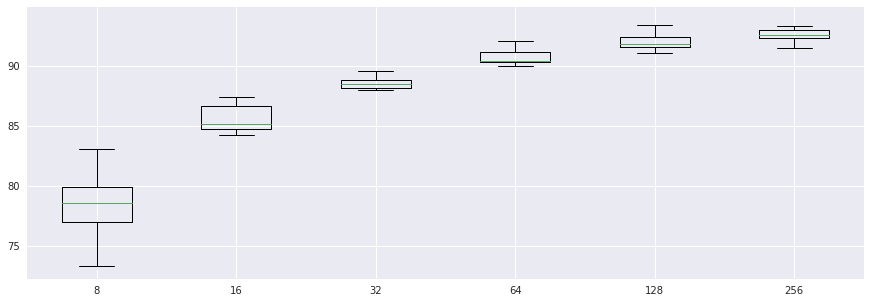

In [12]:
# Ajustando e validando um modelo
def evaluate_model(X_train, y_train, X_test, y_test, n_filters):
    verbose, epochs, batch_size = 0, 10, 32
    n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
    model = Sequential()
    model.add(Conv1D(filters=n_filters, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
    model.add(Conv1D(filters=n_filters, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Ajustando a rede
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    # Validando o modelo
    _, accuracy = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)
    return accuracy
 
# Resumindo as pontuações
def summarize_results(scores, params):
    print(scores, params)
    # Resumindo média e desvio padrão
    for i in range(len(scores)):
        m, s = mean(scores[i]), std(scores[i])
        print('Param=%d: %.3f%% (+/-%.3f)' % (params[i], m, s))
    # Boxplot das pontuações
    pyplot.boxplot(scores, labels=params)
    pyplot.savefig('exp_cnn_filters.png')
 
# Rodando um experimento
def run_experiment(params, repeats=10):
    # Testando cada parâmetro
    all_scores = list()
    for p in params:
        # Repetindo o experimento
        scores = list()
        for r in range(repeats):
            score = evaluate_model(X_train, y_train, X_test, y_test, p)
            score = score * 100.0
            print('>p=%d #%d: %.3f' % (p, r+1, score))
            scores.append(score)
        all_scores.append(scores)
    # Resumindo os resultados
    summarize_results(all_scores, params)
 
# Rodando os experimentos
n_params = [8, 16, 32, 64, 128, 256]
run_experiment(n_params)

### Avaliando o hiperparâmetro "kernel"

>p=2 #1: 90.757
>p=2 #2: 90.757
>p=2 #3: 89.838
>p=2 #4: 92.115
>p=2 #5: 91.747
>p=2 #6: 91.723
>p=2 #7: 91.763
>p=2 #8: 91.364
>p=2 #9: 92.418
>p=2 #10: 91.124
>p=3 #1: 93.201
>p=3 #2: 92.562
>p=3 #3: 92.994
>p=3 #4: 93.113
>p=3 #5: 93.161
>p=3 #6: 92.818
>p=3 #7: 93.329
>p=3 #8: 91.611
>p=3 #9: 93.217
>p=3 #10: 92.594
>p=5 #1: 93.968
>p=5 #2: 93.129
>p=5 #3: 94.008
>p=5 #4: 93.832
>p=5 #5: 91.891
>p=5 #6: 92.458
>p=5 #7: 94.056
>p=5 #8: 92.962
>p=5 #9: 93.137
>p=5 #10: 92.794
[[90.75657106335385, 90.75657106383002, 89.83782056403291, 92.11472397539346, 91.7472237756651, 91.72325637133498, 91.7632020452185, 91.36374530685951, 92.4183110969082, 91.12407126355839], [93.20124630550136, 92.56211552288886, 92.99352880083087, 93.11336582248143, 93.16130063161783, 92.8177678357434, 93.32907246145243, 91.61140848493731, 93.21722457457857, 92.59407206199569], [93.96820324358872, 93.12934409251102, 94.00814891747224, 93.83238795286096, 91.89102820164577, 92.45825677126791, 94.05608372613246, 92

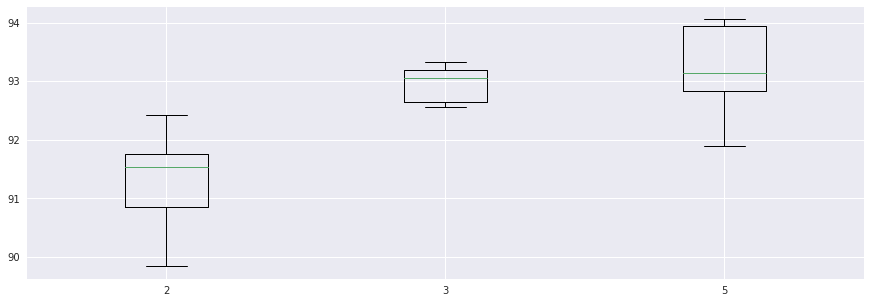

In [12]:
# Ajustando e validando um modelo
def evaluate_model(X_train, y_train, X_test, y_test, n_kernel):
    verbose, epochs, batch_size = 0, 15, 32
    n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=n_kernel, activation='relu', input_shape=(n_timesteps,n_features)))
    model.add(Conv1D(filters=64, kernel_size=n_kernel, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Ajustando a rede
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    # Validando o modelo
    _, accuracy = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)
    return accuracy
 
# Resumindo as pontuações
def summarize_results(scores, params):
    print(scores, params)
    # Resumindo média e desvio padrão
    for i in range(len(scores)):
        m, s = mean(scores[i]), std(scores[i])
        print('Param=%d: %.3f%% (+/-%.3f)' % (params[i], m, s))
    # Boxplot das pontuações
    pyplot.boxplot(scores, labels=params)
    pyplot.savefig('exp_cnn_kernel[2].png')
 
# Rodando um experimento
def run_experiment(params, repeats=10):
    # Testando cada parâmetro
    all_scores = list()
    for p in params:
        # Repetindo o experimento
        scores = list()
        for r in range(repeats):
            score = evaluate_model(X_train, y_train, X_test, y_test, p)
            score = score * 100.0
            print('>p=%d #%d: %.3f' % (p, r+1, score))
            scores.append(score)
        all_scores.append(scores)
    # Resumindo os resultados
    summarize_results(all_scores, params)
 
# Rodando o experimento
n_params = [2, 3, 5]
run_experiment(n_params)

### Avaliando um modelo "Multi-head"

In [13]:
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from keras.layers import Input
from keras.models import Model
from keras.utils.vis_utils import plot_model
from keras.layers.merge import concatenate

# Ajustando e validando um modelo
def evaluate_model(X_train, y_train, X_test, y_test):
    verbose, epochs, batch_size = 0, 10, 32
    n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
     # head 1
    inputs1 = Input(shape=(n_timesteps,n_features))
    conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(inputs1)
    drop1 = Dropout(0.5)(conv1)
    pool1 = MaxPooling1D(pool_size=2)(drop1)
    flat1 = Flatten()(pool1)
    # head 2
    inputs2 = Input(shape=(n_timesteps,n_features))
    conv2 = Conv1D(filters=64, kernel_size=5, activation='relu')(inputs2)
    drop2 = Dropout(0.5)(conv2)
    pool2 = MaxPooling1D(pool_size=2)(drop2)
    flat2 = Flatten()(pool2)
    # head 3
    inputs3 = Input(shape=(n_timesteps,n_features))
    conv3 = Conv1D(filters=64, kernel_size=11, activation='relu')(inputs3)
    drop3 = Dropout(0.5)(conv3)
    pool3 = MaxPooling1D(pool_size=2)(drop3)
    flat3 = Flatten()(pool3)
    # Combinação
    merged = concatenate([flat1, flat2, flat3])
    # Interpretação
    dense1 = Dense(100, activation='relu')(merged)
    outputs = Dense(n_outputs, activation='softmax')(dense1)
    model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
    # Salvando uma imagem do modelo
    plot_model(model, show_shapes=True, to_file='multichannel.png')
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Ajustando a rede
    model.fit([X_train,X_train,X_train], y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    # Validando o modelo
    _, accuracy = model.evaluate([X_test,X_test,X_test], y_test, batch_size=batch_size, verbose=0)
    return accuracy
 
# Resumindo as pontuações
def summarize_results(scores):
    print(scores)
    m, s = mean(scores), std(scores)
    print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))
 
# Rodando um experimento
def run_experiment(repeats=10):
    # Repetindo o experimento
    scores = list()
    for r in range(repeats):
        score = evaluate_model(X_train, y_train, X_test, y_test)
        score = score * 100.0
        print('>#%d: %.3f' % (r+1, score))
        scores.append(score)
    # Resumindo os resultados
    summarize_results(scores)
 
# Rodando o experimento
run_experiment()

>#1: 88.647
>#2: 87.880
>#3: 89.406
>#4: 87.825
>#5: 88.040
>#6: 88.663
>#7: 88.592
>#8: 87.058
>#9: 88.232
>#10: 89.127
[88.64743948278026, 87.88048254374051, 89.40640728609091, 87.82455860030358, 88.04026523975078, 88.66341775233366, 88.59151553886714, 87.05760166221623, 88.23200447439167, 89.12678756890628]
Accuracy: 88.347% (+/-0.651)


### Avaliando o hiperparâmetro "epochs"

>p=10 #1: 90.038
>p=10 #2: 90.549
>p=10 #3: 90.541
>p=10 #4: 91.611
>p=10 #5: 91.563
>p=10 #6: 90.469
>p=10 #7: 89.518
>p=10 #8: 91.188
>p=10 #9: 90.077
>p=10 #10: 90.605
>p=20 #1: 93.081
>p=20 #2: 94.040
>p=20 #3: 92.890
>p=20 #4: 94.008
>p=20 #5: 93.633
>p=20 #6: 92.546
>p=20 #7: 92.267
>p=20 #8: 94.192
>p=20 #9: 93.489
>p=20 #10: 94.024
>p=40 #1: 95.686
>p=40 #2: 94.871
>p=40 #3: 94.999
>p=40 #4: 95.518
>p=40 #5: 94.823
>p=40 #6: 94.831
>p=40 #7: 93.752
>p=40 #8: 94.615
>p=40 #9: 95.310
>p=40 #10: 95.694
>p=80 #1: 96.093
>p=80 #2: 96.597
>p=80 #3: 94.903
>p=80 #4: 95.119
>p=80 #5: 95.614
>p=80 #6: 95.989
>p=80 #7: 96.740
>p=80 #8: 96.517
>p=80 #9: 96.397
>p=80 #10: 95.758
[[90.03754893345051, 90.54885355963573, 90.54086442438283, 91.61140848446114, 91.5634736758009, 90.4689622113925, 89.51825517296477, 91.18798434177204, 90.07749460733403, 90.60477750259646], [93.08140928337461, 94.04010545705525, 92.88967004873372, 94.00814891747224, 93.63265958344336, 92.54613725333546, 92.2665175

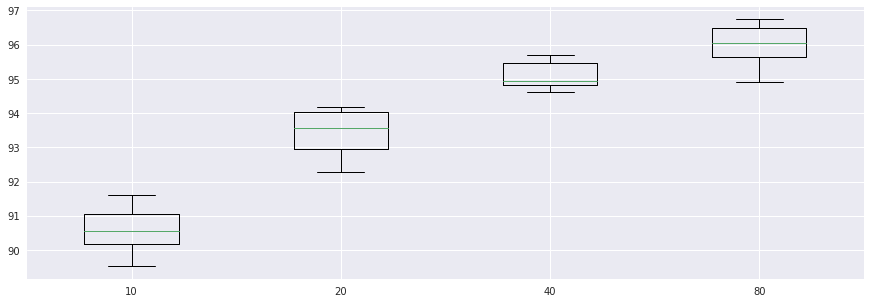

In [14]:
# Ajustando e validando um modelo
def evaluate_model(X_train, y_train, X_test, y_test, n_epochs):
    verbose, epochs, batch_size = 0, n_epochs, 32
    n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Ajustando a rede
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    # Validando o modelo
    _, accuracy = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)
    return accuracy
 
# Resumindo as pontuações
def summarize_results(scores, params):
    print(scores, params)
    # Resumindo média e desvio padrão
    for i in range(len(scores)):
        m, s = mean(scores[i]), std(scores[i])
        print('Param=%d: %.3f%% (+/-%.3f)' % (params[i], m, s))
    # Boxplot das pontuações
    pyplot.boxplot(scores, labels=params)
    pyplot.savefig('exp_cnn_epochs[2].png')
 
# Rodando um experimento
def run_experiment(params, repeats=10):
    # Testando cada parâmetro
    all_scores = list()
    for p in params:
        # Repetindo o experimento
        scores = list()
        for r in range(repeats):
            score = evaluate_model(X_train, y_train, X_test, y_test, p)
            score = score * 100.0
            print('>p=%d #%d: %.3f' % (p, r+1, score))
            scores.append(score)
        all_scores.append(scores)
    # Resumindo os resultados
    summarize_results(all_scores, params)
 
# Rodando o experimento
n_params = [10, 20, 40, 80]
run_experiment(n_params)

### Avaliando o hiperparâmetro "Batch size"

>p=32 #1: 92.203
>p=32 #2: 93.265
>p=32 #3: 89.694
>p=32 #4: 92.498
>p=32 #5: 91.388
>p=32 #6: 93.321
>p=32 #7: 92.195
>p=32 #8: 92.195
>p=32 #9: 92.626
>p=32 #10: 93.249
>p=64 #1: 89.390
>p=64 #2: 91.220
>p=64 #3: 91.068
>p=64 #4: 90.205
>p=64 #5: 90.908
>p=64 #6: 90.717
>p=64 #7: 90.860
>p=64 #8: 91.084
>p=64 #9: 90.773
>p=64 #10: 89.247
>p=128 #1: 86.363
>p=128 #2: 88.799
>p=128 #3: 87.585
>p=128 #4: 87.521
>p=128 #5: 86.466
>p=128 #6: 87.489
>p=128 #7: 89.766
>p=128 #8: 88.488
>p=128 #9: 88.943
>p=128 #10: 87.537
[[92.20260445793721, 93.2651593832388, 89.69401613852844, 92.49820244467524, 91.38771271118962, 93.32108332715191, 92.19461532363668, 92.1946153231605, 92.6260286015787, 93.24918111368538], [89.39042902272797, 91.21994088659312, 91.06814732583575, 90.20532076518985, 90.90836463030168, 90.71662539566078, 90.86042982164145, 91.08412558586537, 90.77254933433582, 89.24662459198541], [86.3625469142621, 88.79923302115672, 87.5848845422406, 87.52097146878887, 86.46640567826398, 8

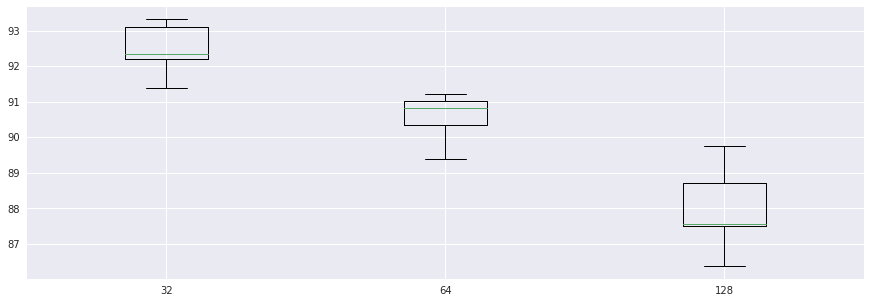

In [11]:
# Ajustando e validando um modelo
def evaluate_model(X_train, y_train, X_test, y_test, n_batch_size):
    verbose, epochs, batch_size = 0, 15, n_batch_size
    n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Ajustando a rede
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    # Validando o modelo
    _, accuracy = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)
    return accuracy
 
# Resumindo as pontuações
def summarize_results(scores, params):
    print(scores, params)
    # Resumindo média e desvio padrão
    for i in range(len(scores)):
        m, s = mean(scores[i]), std(scores[i])
        print('Param=%d: %.3f%% (+/-%.3f)' % (params[i], m, s))
    # Boxplot das pontuações
    pyplot.boxplot(scores, labels=params)
    pyplot.savefig('exp_cnn_batch_size[2].png')
 
# Rodando um experimento
def run_experiment(params, repeats=10):
    # Testando cada parâmetro
    all_scores = list()
    for p in params:
        # Repetindo experimento
        scores = list()
        for r in range(repeats):
            score = evaluate_model(X_train, y_train, X_test, y_test, p)
            score = score * 100.0
            print('>p=%d #%d: %.3f' % (p, r+1, score))
            scores.append(score)
        all_scores.append(scores)
    # Resumindo resultados
    summarize_results(all_scores, params)
 
# Rodando o experimento
n_params = [32, 64, 128]
run_experiment(n_params)

### Modelo final
Após a avaliação do comportamento do modelo com os diversos valores para os hiperparâmetros, foram escolhidos os valores para o modelo final.

In [11]:
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from keras.layers import Input
from keras.models import Model
from keras.utils.vis_utils import plot_model
from keras.layers.merge import concatenate

# Ajustando e validando um modelo
def evaluate_model(X_train, y_train, X_test, y_test):
    verbose, epochs, batch_size = 0, 80, 32
    n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
    model = Sequential()
    model.add(Conv1D(2,2,activation='relu',input_shape=(37, 1)))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Ajustando a rede
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    # Validando o modelo
    _, accuracy = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)
    return accuracy

# Resumindo as pontuações
def summarize_results(scores):
    print(scores)
    m, s = mean(scores), std(scores)
    print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

# Rodando um experimento
def run_experiment(repeats=10):
    # Repetindo o experimento
    scores = list()
    for r in range(repeats):
        score = evaluate_model(X_train, y_train, X_test, y_test)
        score = score * 100.0
        print('>#%d: %.3f' % (r+1, score))
        scores.append(score)
    # Resumindo os resultados
    summarize_results(scores)

# Rodando o experimento
run_experiment()

>#1: 95.246
>#2: 96.109
>#3: 93.657
>#4: 92.690
>#5: 94.727
>#6: 96.485
>#7: 93.393
>#8: 95.358
>#9: 95.310
>#10: 94.687
[95.24646480786132, 96.10929136374531, 93.65662698729727, 92.68994167979233, 94.72717104737556, 96.48478069872657, 93.39298554014225, 95.35831269473516, 95.31037788655112, 94.68722537349204]
Accuracy: 94.766% (+/-1.143)
